In [2]:
import numpy as np 
import pandas as pd
import gensim
from gensim import corpora, models, similarities
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from IPython.display import Image

In [3]:
df_En=pd.read_csv("preprocessed_data_en.csv")
df_De=pd.read_csv("preprocessed_data_de.csv")

In [4]:
df_En.head()

,Nachrichtentyp,Datun,Uhrzeit,Absender,Ort,Text,ID,text_wo_seinfo,text_wo_seinfo_wo_enter,text_wo_seinfo_wo_enter_lower,text_wo_seinfo_wo_enter_lower_wo_punct,text_wo_seinfo_wo_enter_lower_wo_punct_wo_stop,text_wo_seinfo_wo_enter_lower_wo_punct_wo_stoptext_wo_stopfreq,text_wo_seinfo_wo_enter_lower_wo_punct_wo_stoptext_wo_stopfreq_wo_stopfreqrare,text_wo_seinfo_wo_enter_lower_wo_punct_wo_stoptext_wo_stopfreq_wo_stopfreqrare_wo_num,text_wo_seinfo_wo_enter_lower_wo_punct_wo_stoptext_wo_stopfreq_wo_stopfreqrare_wo_num_wo_numbeginn,language,text_stemmed,text_lemmatization
0,Beschreibung,2015.12.03,15:03:07,U2GB007PA1,<LOCATION>,"One of our Instructors, <PERSON16> with U-User...",2000000090,"One of our Instructors, with U-User ID U2GB00...","One of our Instructors, with U-User ID U2GB00...","one of our instructors, with u-user id u2gb00...",one of our instructors with u user id u2gb00...,one instructors u user id u2gb007am2 logged sa...,instructors u user id u2gb007am2 logged emea p...,instructors u user id u2gb007am2 logged emea p...,instructors u user id u2gb007am2 logged emea p...,instructors u user id u2gb007am2 logged emea p...,en,instructor u user id u2gb007am2 log emea porta...,instructor u user -PRON- would u2gb007am2 log ...
1,Beschreibung,2015.12.03,18:37:16,U2GB007PA1,<LOCATION>,"One of our Instructors, <PERSON16> with U-User...",2000000094,"One of our Instructors, with U-User ID U2GB00...","One of our Instructors, with U-User ID U2GB00...","one of our instructors, with u-user id u2gb00...",one of our instructors with u user id u2gb00...,one instructors u user id u2gb007am2 longer lo...,instructors u user id u2gb007am2 longer login ...,instructors u user id u2gb007am2 longer login ...,instructors u user id u2gb007am2 longer login ...,instructors u user id u2gb007am2 longer login ...,en,instructor u user id u2gb007am2 longer login e...,instructor u user -PRON- would u2gb007am2 long...
2,Beschreibung,2015.12.15,15:04:14,U2GB007PA1,<LOCATION>,This is in relation to my ongoing efforts to g...,2000000120,This is in relation to my ongoing efforts to g...,This is in relation to my ongoing efforts to g...,this is in relation to my ongoing efforts to g...,this is in relation to my ongoing efforts to g...,relation ongoing efforts get instructor able u...,relation ongoing efforts instructor able servi...,relation instructor able service desk via emea...,relation instructor able service desk via emea...,relation instructor able service desk via emea...,en,relat instructor abl servic desk via emea port...,relation instructor able service desk via emea...
3,Beschreibung,2015.12.15,15:19:39,U2GB007PA1,<LOCATION>,I would like instructor <PERSON23> who is regi...,2000000121,I would like instructor who is registered on ...,I would like instructor who is registered on ...,i would like instructor who is registered on ...,i would like instructor who is registered on ...,would like instructor registered courses able ...,instructor registered courses able access serv...,instructor registered courses able access serv...,instructor registered courses able access serv...,instructor registered courses able access serv...,en,instructor regist cours abl access servic desk...,instructor register course able access service...
4,Beschreibung,2015.12.15,23:33:59,SMB_I4000001,<LOCATION>,Hello from SAPGui on system I40\n(<LOCATION18>...,2000000123,Hello from SAPGui on system I40\n()~Pimpgang!~,Hello from SAPGui on system I40 ()~Pimpgang!~,hello from sapgui on system i40 ()~pimpgang!~,hello from sapgui on system i40 pimpgang,hello sapgui system i40 pimpgang,sapgui i40 pimpgang,sapgui i40,sapgui i40,sapgui i40,en,sapgui i40,sapgui i40


In [5]:
df_En["text_lemmatization"] = df_En["text_lemmatization"].fillna("")
df_De["text_lemmatization"] = df_De["text_lemmatization"].fillna("")

# English Data

## Tf-idf vectorizer

In [6]:
vectorizer = TfidfVectorizer(max_features= 1000, max_df = 0.5, smooth_idf=True)

X = vectorizer.fit_transform(df_En["text_lemmatization"])

X.shape # check shape of the document-term matrix

(2406, 1000)

## LDA Model

Latent Dirichlet Allocation (LDA) is a generative statistical model that allows sets of observations to be explained by unobserved groups that explain why some parts of the data are similar. For example, if observations are words collected into documents, it posits that each document is a mixture of a small number of topics and that each word's presence is attributable to one of the document's topics. LDA is an example of a topic model and belongs to the machine learning field and in a wider sense to the artificial intelligence field.

 <br> source:https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation

In [7]:
Image(url='https://miro.medium.com/max/1276/0*Sj65xR38wDwuxhtr.jpg', width=800, height=800)

 Topic modeling will be done by using latent Dirichlet allocation (LDA). This is a generative statistical model that allows to explain phrases by sharing topics.

In [8]:
list = [] # create empty list for corpora.Dictionary

for i in range(X.shape[0]):
    list.append(df_En["text_lemmatization"][i].split()) # dictionary
    
dictionary = corpora.Dictionary(list)
corpus = [dictionary.doc2bow(sentence) for sentence in list]

API reference for lda.print_topic:
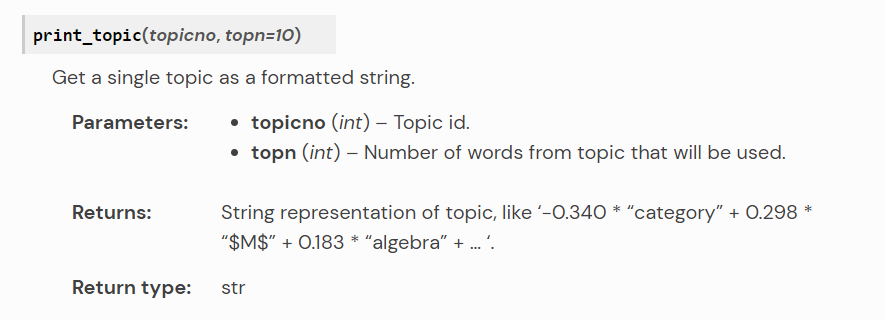

In [9]:
num_topics = 7 # number of topics

lda = gensim.models.ldamodel.LdaModel(corpus = corpus, id2word = dictionary, num_topics = num_topics)

for i in range(num_topics):
    print("Topic of cluster "+ str(i)+':\n'+lda.print_topic(i,topn = 10))

Topic of cluster 0:
0.071*"client" + 0.024*"team" + 0.019*"refresh" + 0.014*"customer" + 0.012*"date" + 0.012*"university" + 0.012*"issue" + 0.011*"provision" + 0.011*"erpsim" + 0.011*"email"
Topic of cluster 1:
0.031*"student" + 0.017*"user" + 0.012*"create" + 0.010*"domain" + 0.010*"team" + 0.009*"message" + 0.009*"time" + 0.008*"client" + 0.008*"issue" + 0.008*"university"
Topic of cluster 2:
0.010*"student" + 0.009*"try" + 0.009*"access" + 0.009*"user" + 0.008*"find" + 0.008*"gui" + 0.007*"round" + 0.007*"issue" + 0.007*"client" + 0.007*"password"
Topic of cluster 3:
0.019*"ushell" + 0.015*"domain" + 0.013*"resource" + 0.012*"client" + 0.011*"student" + 0.011*"erpsim" + 0.009*"game" + 0.009*"team" + 0.009*"ui5" + 0.008*"access"
Topic of cluster 4:
0.049*"client" + 0.030*"university" + 0.026*"contract" + 0.025*"gbi" + 0.024*"team" + 0.020*"hana" + 0.019*"date" + 0.015*"request" + 0.014*"user" + 0.013*"access"
Topic of cluster 5:
0.016*"datum" + 0.014*"user" + 0.014*"student" + 0.014

# German Data

In [10]:
vectorizer = TfidfVectorizer(max_features= 1000,max_df = 0.5, smooth_idf=True)

X_De = vectorizer.fit_transform(df_De["text_lemmatization"])

X_De.shape # check shape of the document-term matrix

(3877, 1000)

In [11]:
list = [] # create empty list for corpora.Dictionary

for i in range(X_De.shape[0]):
    list.append(df_De["text_lemmatization"][i].split()) # dictionary
    
dictionary = corpora.Dictionary(list)
corpus = [dictionary.doc2bow(sentence) for sentence in list]

In [12]:
lda_de = gensim.models.ldamodel.LdaModel(corpus = corpus, id2word = dictionary, num_topics = num_topics)

for i in range(num_topics):
    print("Topic of cluster "+ str(i)+':\n'+lda_de.print_topic(i,topn = 10))

Topic of cluster 0:
0.019*"ui5" + 0.018*"domain" + 0.017*"user" + 0.016*"ushell" + 0.010*"bc" + 0.009*"ui2" + 0.008*"meldung" + 0.008*"kommen" + 0.008*"fehlermeldung" + 0.007*"folgend"
Topic of cluster 1:
0.030*"mandanten" + 0.016*"mandant" + 0.011*"gbi" + 0.009*"zurücksetzen" + 0.009*"gut" + 0.008*"mögen" + 0.008*"können" + 0.007*"anlegen" + 0.007*"fehler" + 0.006*"bitten"
Topic of cluster 2:
0.014*"user" + 0.014*"gbi" + 0.011*"hana" + 0.011*"mandanten" + 0.010*"team" + 0.010*"gut" + 0.008*"werden" + 0.007*"mögen" + 0.006*"neu" + 0.005*"anlegen"
Topic of cluster 3:
0.014*"team" + 0.013*"domain" + 0.009*"hana" + 0.008*"user" + 0.008*"folgend" + 0.007*"mandant" + 0.007*"java" + 0.007*"mandanten" + 0.006*"erp" + 0.006*"passwort"
Topic of cluster 4:
0.018*"domain" + 0.008*"hana" + 0.008*"email" + 0.008*"team" + 0.007*"gut" + 0.006*"gui" + 0.006*"installation" + 0.006*"zugreifen" + 0.006*"hochschule" + 0.006*"service"
Topic of cluster 5:
0.010*"neu" + 0.010*"hana" + 0.008*"fragen" + 0.007*